# Load Libraries

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data and the 12 most important variables

In [2]:
df = pd.read_csv('../Data/preprocessed_dataframes/data_trees.csv')

top12_variables = ["y", "x_32", "x_62","x_36", "x_57","x_10", "x_30", "x_41","x_45", "x_29","x_54", "x_76", "x_64"]
df_12 = df[top12_variables]

data = df_12.to_numpy()

X = data[:,1:]
y = data[:,0]

[n, p] = np.shape(X)

n, p

(100, 12)

# Bagging

In [3]:
bagging = BaggingRegressor(DecisionTreeRegressor(), bootstrap=True, oob_score=True, random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators':range(20, 50),  # Number of trees in the ensemble
    'max_samples': range(20, 60, 5),  # Proportion of training data per tree
}

# Perform Grid Search with 5-fold cross-validation
bagging_grid = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5, verbose=2, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search model
bagging_grid.fit(X, y)

# Save results
df_bagging = pd.DataFrame(bagging_grid.cv_results_)
df_bagging.to_csv('../Data/ensemble_trees_cv_results/ensemble_top12_NAs/CrossValidationResultsBagging_top12.csv')

# Get the best model
print(bagging_grid.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
{'max_samples': 35, 'n_estimators': 29}


Text(0, 0.5, 'Mean test accuracy')

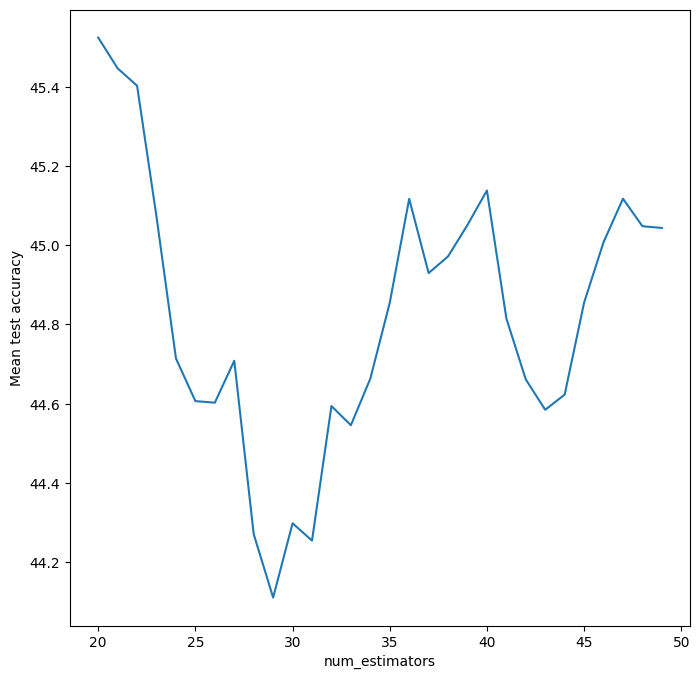

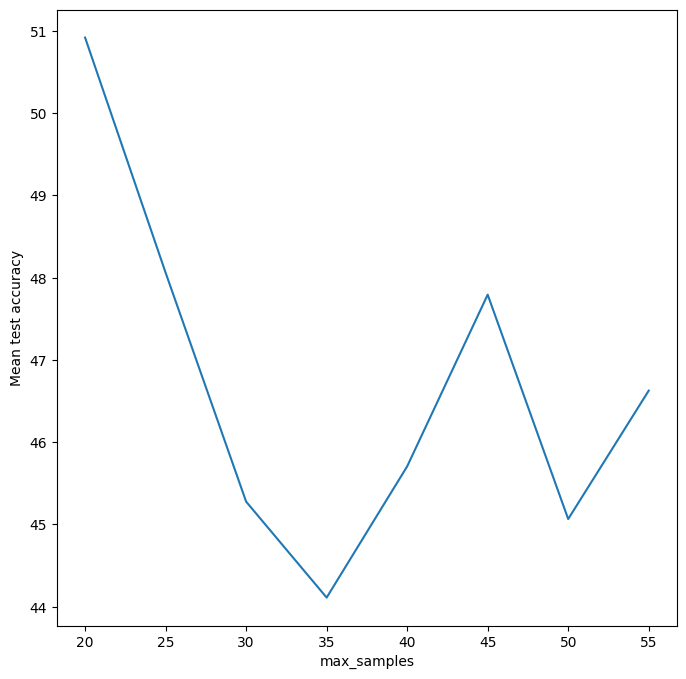

In [5]:
# Add the RMSE value
df_bagging['RMSE'] = np.sqrt(-df_bagging['mean_test_score'])

#Num estimators plot
df_num_estimators = df_bagging[((df_bagging['param_max_samples']==35))]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('Mean test accuracy')

# Num Max samples
df_max_samples = df_bagging[(df_bagging['param_n_estimators']==29)]

fig, ax = plt.subplots(figsize=(8,8))

_ = sns.lineplot(data=df_max_samples, x='param_max_samples', y='RMSE', ax=ax)
ax.set_xlabel('max_samples')
ax.set_ylabel('Mean test accuracy')

In [6]:
# Cross-validation evaluation
best_bagging = bagging_grid.best_estimator_
scores = cross_val_score(best_bagging, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Bagging Regressor: {np.mean(rmse_scores)}")

Mean RMSE for Bagging Regressor: 43.35185481030447


# Random Forest

In [43]:
X.shape

(100, 12)

In [4]:
rf = RandomForestRegressor(bootstrap=True, oob_score=True,random_state=0)

param_grid = {
    'n_estimators': range(20,50, 2),
    'max_features': [12],
    'max_samples': range(60, 80) ,
    'min_samples_leaf': [2],

}

rf_grid = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
rf_grid.fit(X, y)

# Save the model
# Save results
df_forest = pd.DataFrame(rf_grid.cv_results_)
df_forest.to_csv('../Data/ensemble_trees_cv_results/ensemble_top12_NAs/CrossValidationResultsRandomForest_top12.csv')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


In [8]:
# Get the best model
print(rf_grid.best_params_)

{'max_features': 12, 'max_samples': 75, 'min_samples_leaf': 2, 'n_estimators': 28}


Text(0, 0.5, 'RMSE')

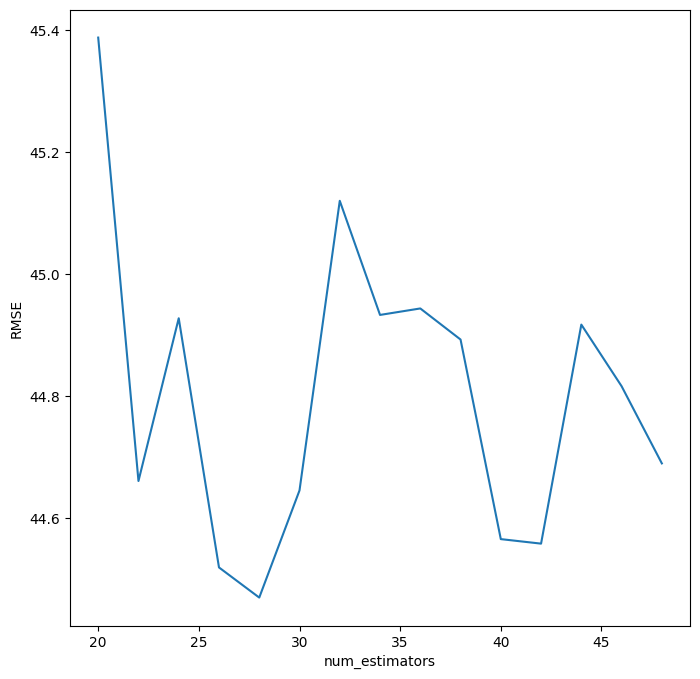

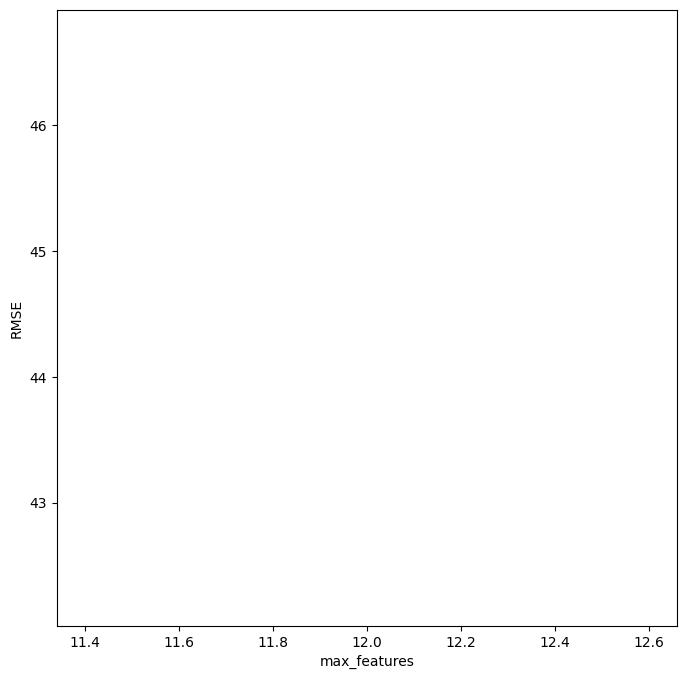

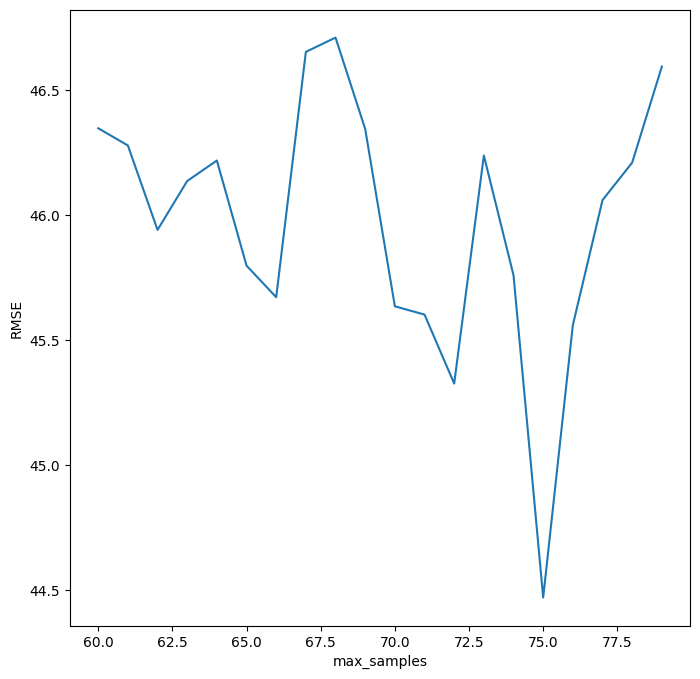

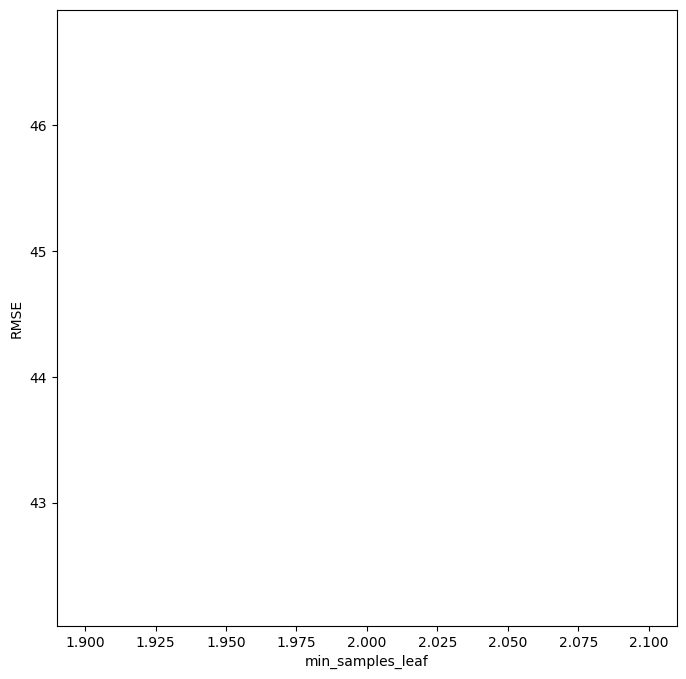

In [9]:
# Add the RMSE variable
df_forest['RMSE'] = np.sqrt(-df_forest['mean_test_score'])

# Plot the number estimators 

df_num_estimators = df_forest[((df_forest['param_max_features']==12) & (df_forest['param_min_samples_leaf']==2) & (df_forest['param_max_samples']==75))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('RMSE')

# --------------------------------------------

# Plot the number of max features

df_max_features = df_forest[((df_forest['param_n_estimators']==28) & (df_forest['param_min_samples_leaf']==2) & (df_forest['param_max_samples']==75))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_features, x='param_max_features', y='RMSE', ax=ax)
ax.set_xlabel('max_features')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of samples

df_max_samples = df_forest[((df_forest['param_n_estimators']==28) & (df_forest['param_min_samples_leaf']==2) & (df_forest['param_max_features']==12))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_samples, x='param_max_samples', y='RMSE', ax=ax)
ax.set_xlabel('max_samples')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of Min leaf

df_min_samples_leaf = df_forest[((df_forest['param_n_estimators']==28) & (df_forest['param_max_samples']==75) & (df_forest['param_max_features']==12))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_min_samples_leaf, x='param_min_samples_leaf', y='RMSE', ax=ax)
ax.set_xlabel('min_samples_leaf')
ax.set_ylabel('RMSE')

In [10]:
# Cross-validation evaluation
best_rf = rf_grid.best_estimator_
scores = cross_val_score(best_rf, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for RF Regressor: {np.mean(rmse_scores)}")

Mean RMSE for RF Regressor: 43.812218528843076


In [16]:
from tabulate import tabulate

## Look at the best estimator and the importance of the features
score = best_rf.fit(X, y)
headers = ["name", "score"]
values = sorted(zip(range(0,116), best_rf.feature_importances_), key=lambda x: x[1] * -1)

# See which features are deemed most important by the classifier
# Only gonna look at the 10 most important features out of 256
print(tabulate(values[0:10], ["name", "score"][0:10], tablefmt="plain"))
print ('Random Forest OOB error rate: {}'.format(1 - best_rf.oob_score_))

  name      score
     0  0.642177
     1  0.127689
     6  0.0442987
     9  0.0313492
     5  0.0308112
     2  0.0249508
     3  0.0237324
     8  0.0216935
     7  0.0171397
     4  0.0146981
Random Forest OOB error rate: 0.29307398005379715


# Boosting

In [ ]:
# Define boosting model
boosting = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
param_grid = {
    'n_estimators': range(60, 90, 2),
    'max_depth': [2],
    'learning_rate': [0.2, 0.25, 0.30, 0.35, 0.40]
}

# Perform Grid Search
boosting_grid = GridSearchCV(boosting, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
boosting_grid.fit(X, y)

# Save results
boosting_df = pd.DataFrame(boosting_grid.cv_results_)
boosting_df.to_csv('../Data/ensemble_trees_cv_results/ensemble_top12/CrossValidationResultsBoosting_top12.csv')

# Get best model
best_boosting = boosting_grid.best_estimator_

# Cross-validation evaluation
scores = cross_val_score(best_boosting, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)

print(f"Mean RMSE for Gradient Boosting: {np.mean(rmse_scores)}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits
Mean RMSE for Gradient Boosting: 35.61800757727421


In [58]:
print(boosting_grid.best_estimator_)
# Add the RMSE variable
boosting_df['RMSE'] = np.sqrt(-boosting_df['mean_test_score'])

GradientBoostingRegressor(learning_rate=0.25, max_depth=2, n_estimators=84,
                          random_state=42)


Text(0, 0.5, 'RMSE')

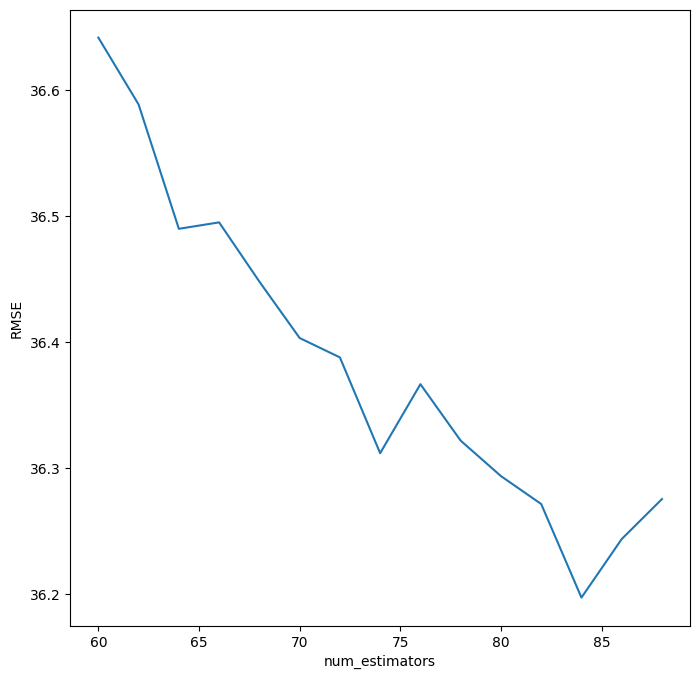

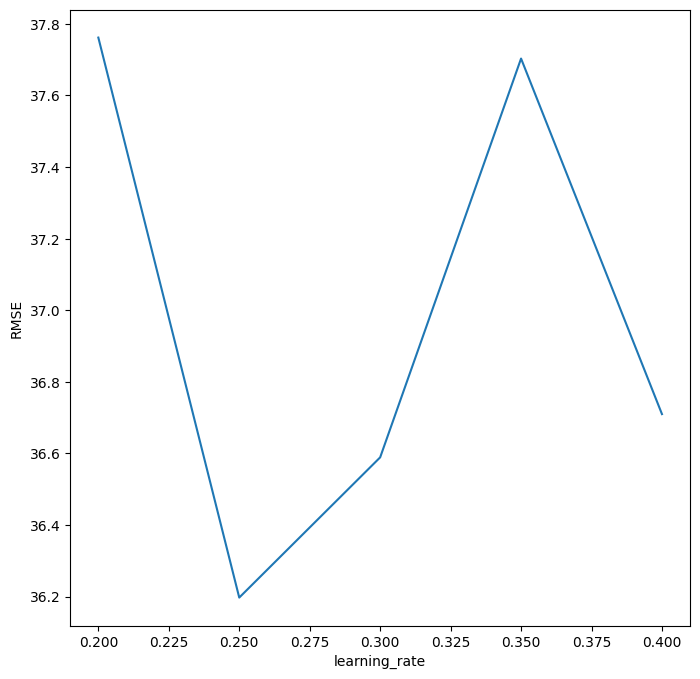

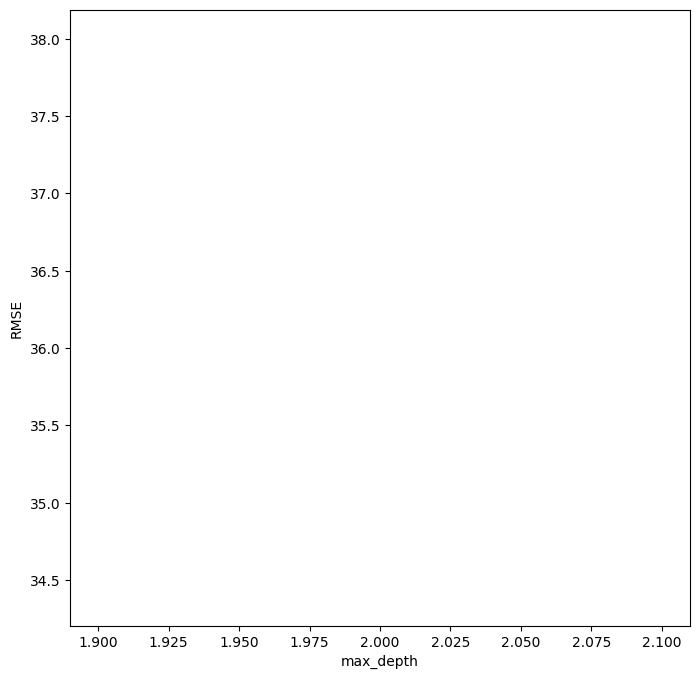

In [59]:
# Plot the number estimators 

df_num_estimators = boosting_df[((boosting_df['param_learning_rate']==0.25) & (boosting_df['param_max_depth']==2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_num_estimators, x='param_n_estimators', y='RMSE', ax=ax)
ax.set_xlabel('num_estimators')
ax.set_ylabel('RMSE')

# --------------------------------------------

# Plot the number of max features

df_learning_rate = boosting_df[((boosting_df['param_n_estimators']==84) & (boosting_df['param_max_depth']==2))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_learning_rate, x='param_learning_rate', y='RMSE', ax=ax)
ax.set_xlabel('learning_rate')
ax.set_ylabel('RMSE')

# -----------------------------------------

# Plot the number of samples

df_max_depth = boosting_df[((boosting_df['param_n_estimators']==84) & (boosting_df['param_learning_rate']==0.25))]
fig, ax = plt.subplots(figsize=(8,8))
_ = sns.lineplot(data=df_max_depth, x='param_max_depth', y='RMSE', ax=ax)
ax.set_xlabel('max_depth')
ax.set_ylabel('RMSE')